## Análisis de la influencia de las funciones de activación en redes neuronales

En una red neuronal, las **funciones de activación** son las responsables de introducir *no linealidad* en el modelo.  
Sin ellas, cada capa se comporta como una transformación lineal, y la composición de múltiples transformaciones lineales sigue siendo lineal. Esto implica que, aunque una red tenga muchas capas y neuronas, si no utiliza funciones de activación, su capacidad de representación se reduce a la de una simple regresión lineal.

En cambio, al incorporar funciones como **ReLU**, **sigmoid** o **tanh**, la red puede modelar relaciones complejas y no lineales entre las variables de entrada y salida. Esto permite que el modelo aprenda patrones más sofisticados, dividiendo el espacio de entrada en regiones donde aplica distintas combinaciones de pesos y sesgos.

A continuación, se realizará una comparativa entre tres casos:  
una red **sin función de activación**, una red con **ReLU** y otra con **sigmoid** en las capas ocultas, para evidenciar cómo la introducción de no linealidades cambia radicalmente el comportamiento del modelo.

---

Consideremos una red con la siguiente estructura:

- Capa de entrada: 2 neuronas $(x_1, x_2)$  
- Primera capa oculta: 3 neuronas  
- Segunda capa oculta: 2 neuronas  
- Capa de salida: 1 neurona  

Denotemos que:  
- $W^{(L)}$ y $b^{(L)}$ los pesos y sesgos de la capa $L$  
- $a^{(L)}$ las activaciones de la capa $L$  
- $z^{(L)} = W^{(L)} a^{(L-1)} + b^{(L)}$ las entradas lineales de la capa $L$  
- $w^{(L)}_{ij}$ es el peso $w$ que conecta la $i$-nésima neurona de la capa $L$ con la $j$-nésima neurona de la capa $L-1$  
- $b^{(L)}_{i}$ es el bias $b$ de la $i$-nésima neurona de la capa $L$  

---

## 1. Caso sin función de activación

### Capa oculta 1 (L = 1)

$$
z^{(1)}_1 = w^{(1)}_{11}x_1 + w^{(1)}_{12}x_2 + b^{(1)}_1
$$
$$
z^{(1)}_2 = w^{(1)}_{21}x_1 + w^{(1)}_{22}x_2 + b^{(1)}_2
$$
$$
z^{(1)}_3 = w^{(1)}_{31}x_1 + w^{(1)}_{32}x_2 + b^{(1)}_3
$$

Como no hay activación:

$$
a^{(1)}_i = z^{(1)}_i
$$

---

### Capa oculta 2 (L = 2)

$$
z^{(2)}_1 = w^{(2)}_{11}a^{(1)}_1 + w^{(2)}_{12}a^{(1)}_2 + w^{(2)}_{13}a^{(1)}_3 + b^{(2)}_1
$$
$$
z^{(2)}_2 = w^{(2)}_{21}a^{(1)}_1 + w^{(2)}_{22}a^{(1)}_2 + w^{(2)}_{23}a^{(1)}_3 + b^{(2)}_2
$$

Sustituyendo las $a^{(1)}_i$:

$$
\begin{aligned}
z^{(2)}_1 &= w^{(2)}_{11}(w^{(1)}_{11}x_1 + w^{(1)}_{12}x_2 + b^{(1)}_1) + w^{(2)}_{12}(w^{(1)}_{21}x_1 + w^{(1)}_{22}x_2 + b^{(1)}_2) + w^{(2)}_{13}(w^{(1)}_{31}x_1 + w^{(1)}_{32}x_2 + b^{(1)}_3) + b^{(2)}_1
\end{aligned}
$$

$$
\begin{aligned}
z^{(2)}_2 &= w^{(2)}_{21}(w^{(1)}_{11}x_1 + w^{(1)}_{12}x_2 + b^{(1)}_1) + w^{(2)}_{22}(w^{(1)}_{21}x_1 + w^{(1)}_{22}x_2 + b^{(1)}_2) + w^{(2)}_{23}(w^{(1)}_{31}x_1 + w^{(1)}_{32}x_2 + b^{(1)}_3) + b^{(2)}_2
\end{aligned}
$$

---

### Capa de salida (L = 3)

$$
z^{(3)}_1 = w^{(3)}_{11}z^{(2)}_1 + w^{(3)}_{12}z^{(2)}_2 + b^{(3)}_1
$$

Si expandimos completamente, todos los términos dependen linealmente de $x_1$ y $x_2$.  
Por tanto:

$$
z^{(3)}_1 = A_1x_1 + A_2x_2 + C
$$

donde $A_1$, $A_2$ y $C$ son combinaciones lineales de pesos y sesgos.

En forma matricial, toda la red puede representarse como:

$$
y = W^{(3)}W^{(2)}W^{(1)}x + (W^{(3)}W^{(2)}b^{(1)} + W^{(3)}b^{(2)} + b^{(3)})
$$

Por comodidad, se agrupan los términos en:

$$
y = W_{ef}x + b_{ef}
$$

donde:  
- $W_{ef}$ (*weight effective*) es la matriz de pesos **efectiva** equivalente  
- $b_{ef}$ (*bias effective*) es el vector de sesgos **efectivo**

**Conclusión:**  
Sin funciones de activación, no importa cuántas capas ni neuronas haya, el modelo sigue siendo una transformación lineal y solo puede encontrar relaciones lineales entre la entrada y la salida.

---

## 2. Caso con ReLU en las capas ocultas

### Capa oculta 1 (L = 1)

$$
a^{(1)}_1 = ReLU(w^{(1)}_{11}x_1 + w^{(1)}_{12}x_2 + b^{(1)}_1)
$$
$$
a^{(1)}_2 = ReLU(w^{(1)}_{21}x_1 + w^{(1)}_{22}x_2 + b^{(1)}_2)
$$
$$
a^{(1)}_3 = ReLU(w^{(1)}_{31}x_1 + w^{(1)}_{32}x_2 + b^{(1)}_3)
$$

---

### Capa oculta 2 (L = 2)

$$
a^{(2)}_1 = ReLU(w^{(2)}_{11}a^{(1)}_1 + w^{(2)}_{12}a^{(1)}_2 + w^{(2)}_{13}a^{(1)}_3 + b^{(2)}_1)
$$
$$
a^{(2)}_2 = ReLU(w^{(2)}_{21}a^{(1)}_1 + w^{(2)}_{22}a^{(1)}_2 + w^{(2)}_{23}a^{(1)}_3 + b^{(2)}_2)
$$

---

### Capa de salida (L = 3)

$$
y = w^{(3)}_{11}a^{(2)}_1 + w^{(3)}_{12}a^{(2)}_2 + b^{(3)}_1
$$

---

Ya no se puede expandir la ecuación en una sola forma lineal, porque cada función ReLU introduce condiciones como:

- Si $z^{(L)}_i > 0$, la neurona $i$ está activa.  
- Si $z^{(L)}_i \le 0$, la neurona $i$ se apaga.

La función ReLU puede expresarse como una ecuación por tramos:

$$
ReLU(x) =
\begin{cases}
x, & \text{si } x > 0 \\
0, & \text{si } x \le 0
\end{cases}
$$

y es equivalente a escribir:

$$
ReLU(x) = \max(0, x)
$$

Su derivada, también definida por tramos, es:

$$
ReLU'(x) =
\begin{cases}
1, & \text{si } x > 0 \\
0, & \text{si } x \le 0
\end{cases}
$$

Esto significa que ReLU transmite el gradiente solo cuando la entrada es positiva, mientras que lo bloquea completamente cuando la entrada es negativa.


Cada combinación de activaciones define una región del espacio $(x_1, x_2)$, dentro de la cual la red es lineal, pero cambia de pendiente al pasar de una región a otra.

Por tanto, la red es **no lineal por partes**. Es decir, que ya puede encontrar patrones y relaciones **no lineales** entra la entrada y la salida.


---

## 3. Caso con Sigmoid en las capas ocultas

### Capa oculta 1 (L = 1)

$$
a^{(1)}_1 = \sigma(w^{(1)}_{11}x_1 + w^{(1)}_{12}x_2 + b^{(1)}_1)
$$
$$
a^{(1)}_2 = \sigma(w^{(1)}_{21}x_1 + w^{(1)}_{22}x_2 + b^{(1)}_2)
$$
$$
a^{(1)}_3 = \sigma(w^{(1)}_{31}x_1 + w^{(1)}_{32}x_2 + b^{(1)}_3)
$$

donde la función sigmoide está dada por:

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

---

### Capa oculta 2 (L = 2)

$$
a^{(2)}_1 = \sigma(w^{(2)}_{11}a^{(1)}_1 + w^{(2)}_{12}a^{(1)}_2 + w^{(2)}_{13}a^{(1)}_3 + b^{(2)}_1)
$$
$$
a^{(2)}_2 = \sigma(w^{(2)}_{21}a^{(1)}_1 + w^{(2)}_{22}a^{(1)}_2 + w^{(2)}_{23}a^{(1)}_3 + b^{(2)}_2)
$$

---

### Capa de salida (L = 3)

$$
y = w^{(3)}_{11}a^{(2)}_1 + w^{(3)}_{12}a^{(2)}_2 + b^{(3)}_1
$$

---

Debido a la presencia de la función $\sigma(\cdot)$ en cada capa, ya no es posible expandir y simplificar la expresión para reducirla a una forma lineal.  
Cada término $a^{(L)}$ depende de una función no lineal aplicada a combinaciones de las entradas anteriores, lo que impide reagrupar los pesos y sesgos como en el caso sin activación.

Por tanto, la salida $y$ no puede expresarse como $y = W_{ef}x + b_{ef}$, ya que la composición de funciones sigmoides genera una relación altamente no lineal entre la entrada y la salida.

---

En este caso, la salida de cada neurona se encuentra **suavemente acotada** entre 0 y 1.  

La función sigmoide se define como:

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

y su derivada es:

$$
\sigma'(x) = \sigma(x) \cdot (1 - \sigma(x))
$$

A diferencia de ReLU, que puede representarse como una función por tramos, la sigmoide no tiene saltos de pendiente,  
sino una transición progresiva que suaviza los cambios de activación.

En este caso, también logramos que la red "escape" de su límite lineal y pueda tener un comportamiento más complejo.



## Ejemplos de funciones de activación:

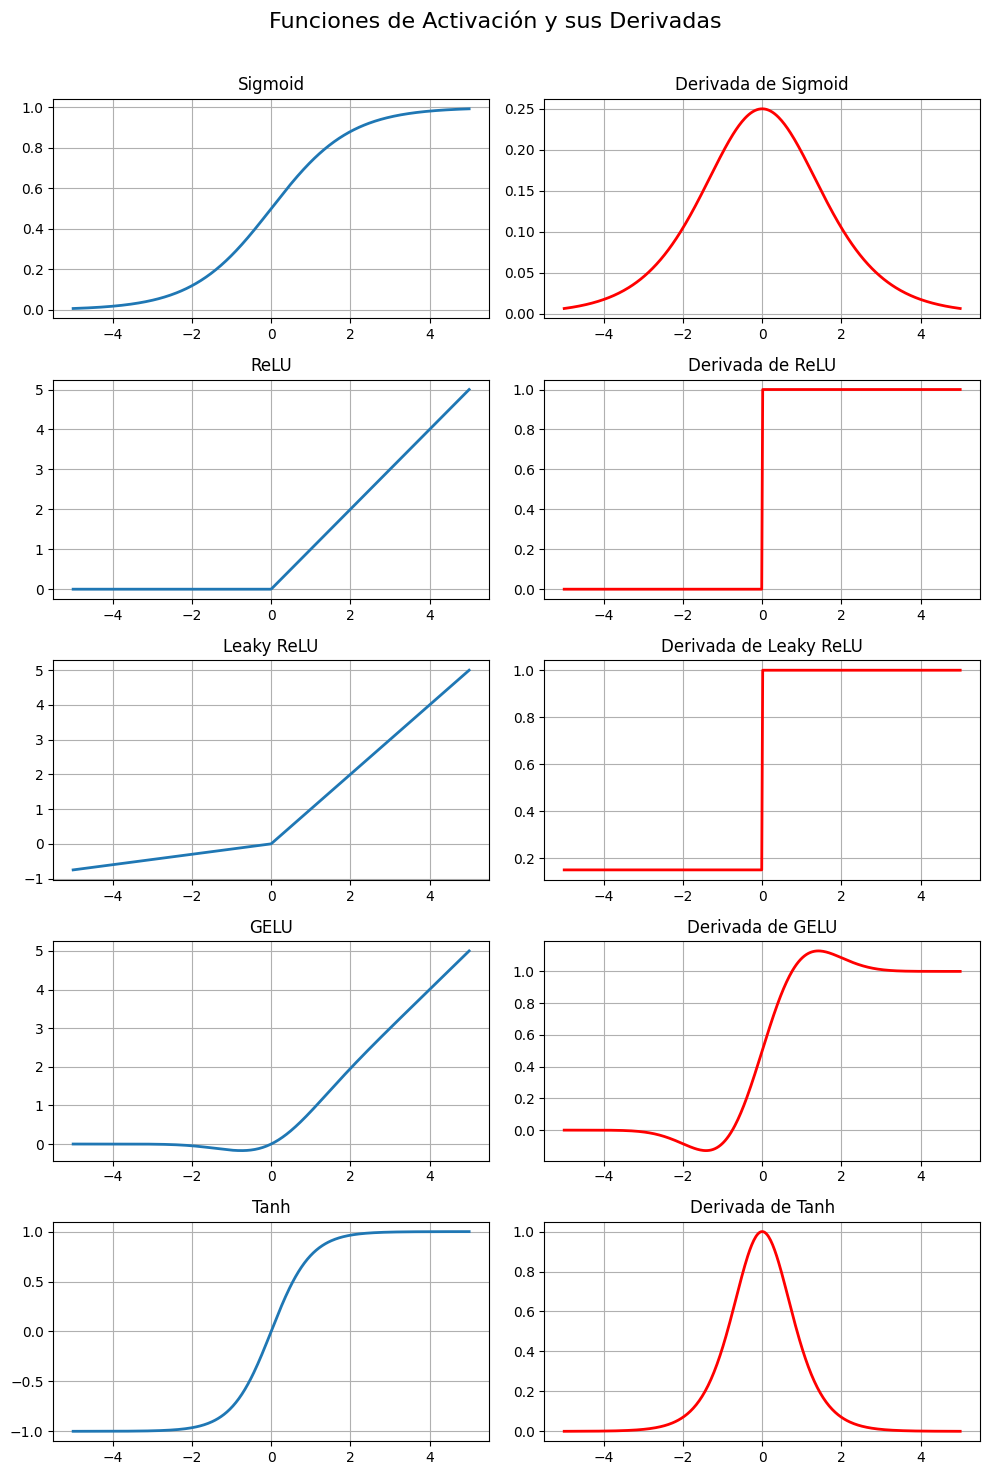

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def leaky_relu(x, alpha=0.15):
    return np.where(x > 0, x, alpha * x)

def leaky_relu_derivative(x, alpha=0.15):
    return np.where(x > 0, 1, alpha)

def gelu(x):
    return 0.5 * x * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * x**3)))

def gelu_derivative(x):
    c = np.sqrt(2 / np.pi)
    return 0.5 * (1 + np.tanh(c * (x + 0.044715 * x**3))) + \
           0.5 * x * (1 - np.tanh(c * (x + 0.044715 * x**3))**2) * c * (1 + 3 * 0.044715 * x**2)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

x = np.linspace(-5, 5, 400)

activations = {
    'Sigmoid': (sigmoid, sigmoid_derivative),
    'ReLU': (relu, relu_derivative),
    'Leaky ReLU': (leaky_relu, leaky_relu_derivative),
    'GELU': (gelu, gelu_derivative),
    'Tanh': (tanh, tanh_derivative)
}

fig, axes = plt.subplots(5, 2, figsize=(10, 15))
fig.suptitle('Funciones de Activación y sus Derivadas', fontsize=16)

for i, (name, (func, dfunc)) in enumerate(activations.items()):
    y = func(x)
    dy = dfunc(x)

    axes[i, 0].plot(x, y, linewidth=2)
    axes[i, 0].set_title(f'{name}')
    axes[i, 0].grid(True)

    axes[i, 1].plot(x, dy, color='r', linewidth=2)
    axes[i, 1].set_title(f'Derivada de {name}')
    axes[i, 1].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()
